In [3]:
!pip install EMD-signal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.9 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you hav

### Visualize Interictal and Ictal Features

In [8]:
import numpy as np # linear algebra
import os
from PyEMD import EMD
import matplotlib.pyplot as plt

In [9]:
# load data
data_path = '/kaggle/input/data-segmentation-bsp-project/interictal_ictal.npy'
label_path = '/kaggle/input/data-segmentation-bsp-project/interictal_ictal_labels.npy'

data = np.load(data_path)
labels = np.load(label_path)

In [10]:
#extract interictal and ictal ids separately
interictal_ids,_ = np.where(labels==0)
ictal_ids,_ =np.where(labels==1)

In [11]:
#create an instance of EMD
emd = EMD()

### Coefficient of Variation

In [12]:
#function to compute coefficient of variation
def compute_vc(s):
    '''
    input: 
        s - 1D signal array
    output:
        vc - coefficient of variation (float)
    '''  
    mu = np.mean(np.abs(s))
    sigma = np.std(s)
    
    vc = np.power(sigma/mu,2)
    
    return vc

In [13]:
#initialize an array to store Vc of interictal IMFs
interictal_vc = []

for int_id in interictal_ids:
    signal = data[int_id] #get the signal
    
    imfs = emd(signal) # perform EMD

    vc = compute_vc(imfs[0]) #compute vc of the 1st IMF
    interictal_vc.append(vc)
    
interictal_vc = np.array(interictal_vc)

In [15]:
#initialize an array to store Vc of ictal IMFs
ictal_vc = []

for ict_id in ictal_ids:
    signal = data[ict_id] #get the signal

    imfs = emd(signal) #perform EMD

    vc = compute_vc(imfs[0]) #compute vc of the 1st IMF
    ictal_vc.append(vc)
    
ictal_vc = np.array(ictal_vc)

In [16]:
print(interictal_vc.shape)
print(ictal_vc.shape)

(400,)
(400,)


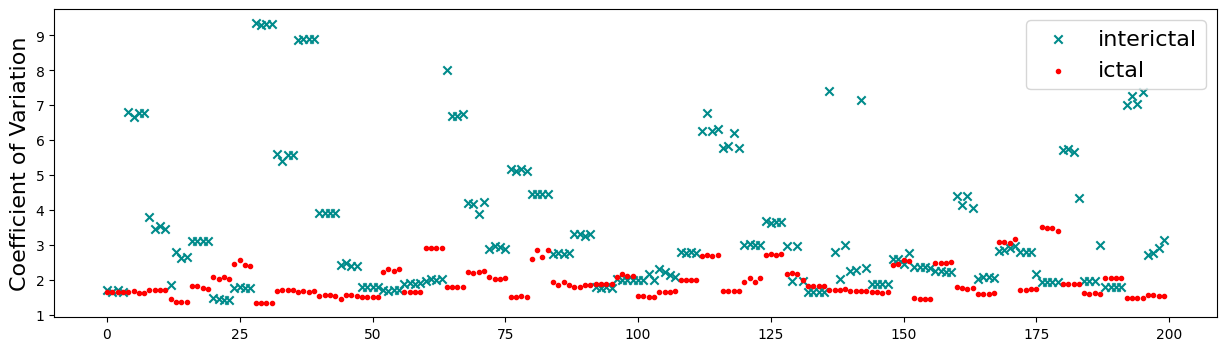

In [38]:
#plot Vc

x_array = np.arange(0,200,1)

plt.figure(figsize=(15,4))
plt.scatter(x_array, interictal_vc[:200], marker='x', label='interictal', c='darkcyan')
plt.scatter(x_array, ictal_vc[:200], marker='.', label='ictal', c='red')
plt.ylabel('Coefficient of Variation', fontsize=16)
plt.legend(prop={'size': 16})
plt.savefig('int_ict_vc_features.png')
plt.show()

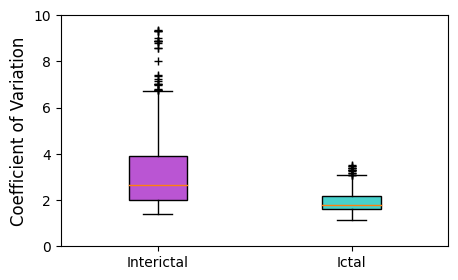

In [62]:
# make box plot

box_data = [interictal_vc , ictal_vc]
box_labels = ['Interictal' , 'Ictal']

flierprops = dict(marker='+', markersize=6, linestyle='none') #outlier display settings

colors = ['mediumorchid', 'mediumturquoise']

plt.figure(figsize=(5,3))
bplot = plt.boxplot(box_data, flierprops=flierprops, patch_artist=True, widths=0.3)

for p, c in zip(bplot['boxes'], colors):
    p.set_facecolor(c)
    
plt.xticks([1, 2], box_labels)
plt.ylim(0,10)
plt.ylabel('Coefficient of Variation', fontsize=12)
plt.savefig('vc_box_plots.png')
plt.show()

### Fluctuation Index

In [63]:
def compute_FI(s):
    '''
    input: 
        s - 1D signal array
    output:
        FI - fluctuation index (float)
    '''  
    FI = np.mean(np.abs(np.diff(s)))
    
    return FI

In [64]:
#initialize an array to store FI of interictal IMFs
interictal_FI = []

for int_id in interictal_ids:
    signal = data[int_id] #get the signal
    
    imfs = emd(signal) # perform EMD

    FI = compute_FI(imfs[0]) #compute FI of the 1st IMF
    interictal_FI.append(FI)
    
interictal_FI = np.array(interictal_FI)

In [65]:
#initialize an array to store FI of ictal IMFs
ictal_FI = []

for ict_id in ictal_ids:
    signal = data[ict_id] #get the signal

    imfs = emd(signal) #perform EMD

    FI = compute_FI(imfs[0]) #compute FI of the 1st IMF
    ictal_FI.append(FI)
    
ictal_FI = np.array(ictal_FI)

In [66]:
print(interictal_FI.shape)
print(ictal_FI.shape)

(400,)
(400,)


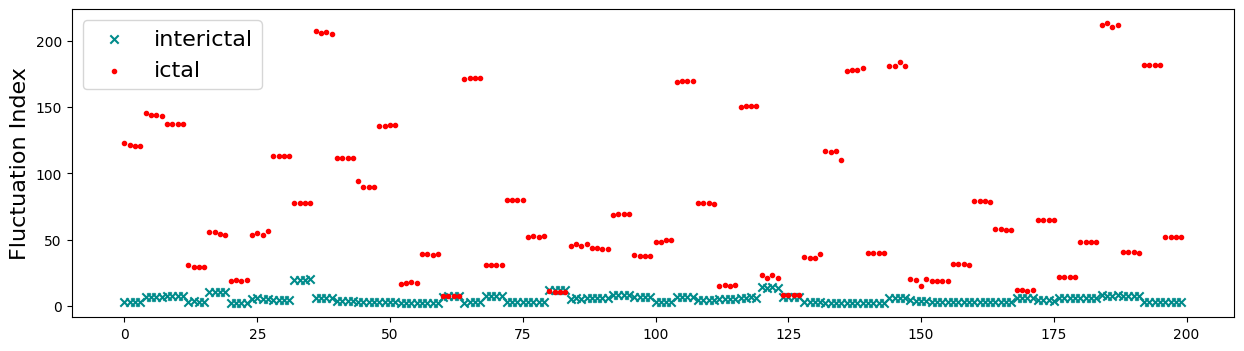

In [67]:
#plot FI

x_array = np.arange(0,200,1)

plt.figure(figsize=(15,4))
plt.scatter(x_array, interictal_FI[:200], marker='x', label='interictal', c='darkcyan')
plt.scatter(x_array, ictal_FI[:200], marker='.', label='ictal', c='red')
plt.ylabel('Fluctuation Index', fontsize=16)
plt.legend(prop={'size': 16})
plt.savefig('int_ict_FI_features.png')
plt.show()

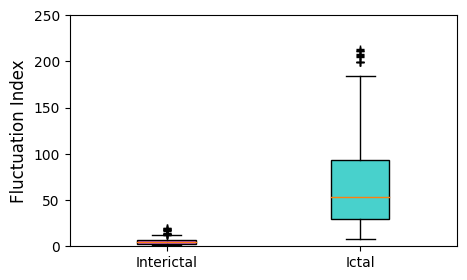

In [72]:
# make box plot

box_data = [interictal_FI , ictal_FI]
box_labels = ['Interictal' , 'Ictal']

flierprops = dict(marker='+', markersize=6, linestyle='none') #outlier display settings

colors = ['mediumorchid', 'mediumturquoise']

plt.figure(figsize=(5,3))
bplot = plt.boxplot(box_data, flierprops=flierprops, patch_artist=True, widths=0.3)

for p, c in zip(bplot['boxes'], colors):
    p.set_facecolor(c)
    
plt.xticks([1, 2], box_labels)
plt.ylim(0,250)
plt.ylabel('Fluctuation Index', fontsize=12)
plt.savefig('FI_box_plots_IMF1.png')
plt.show()